In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#%cd /content/drive/MyDrive/traffic prediction

/content/drive/MyDrive/traffic prediction


# Importing necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Reading CSV file 

In [ ]:
traffic =pd.read_csv('traffic.csv', parse_dates=[0],infer_datetime_format=True)

# Displaying basic information
These cells tell us that the data types of the features. The number if instancese present in the CSV file and if their are any NULL or missing values. I have also checked the number of juntions present in this dataset which is 4.

In [ ]:
traffic.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
traffic.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [ ]:
traffic.Junction.unique()

array([1, 2, 3, 4])

# Feature engineering

In [ ]:
traffic['Year'] = traffic['DateTime'].dt.year
traffic['Month'] = traffic['DateTime'].dt.month
traffic['Day'] = traffic['DateTime'].dt.day
traffic['Hour'] = traffic['DateTime'].dt.hour

In [ ]:
traffic.drop('ID', axis=1, inplace=True)

# Data Visualizations

## Histograms for each of the junctions

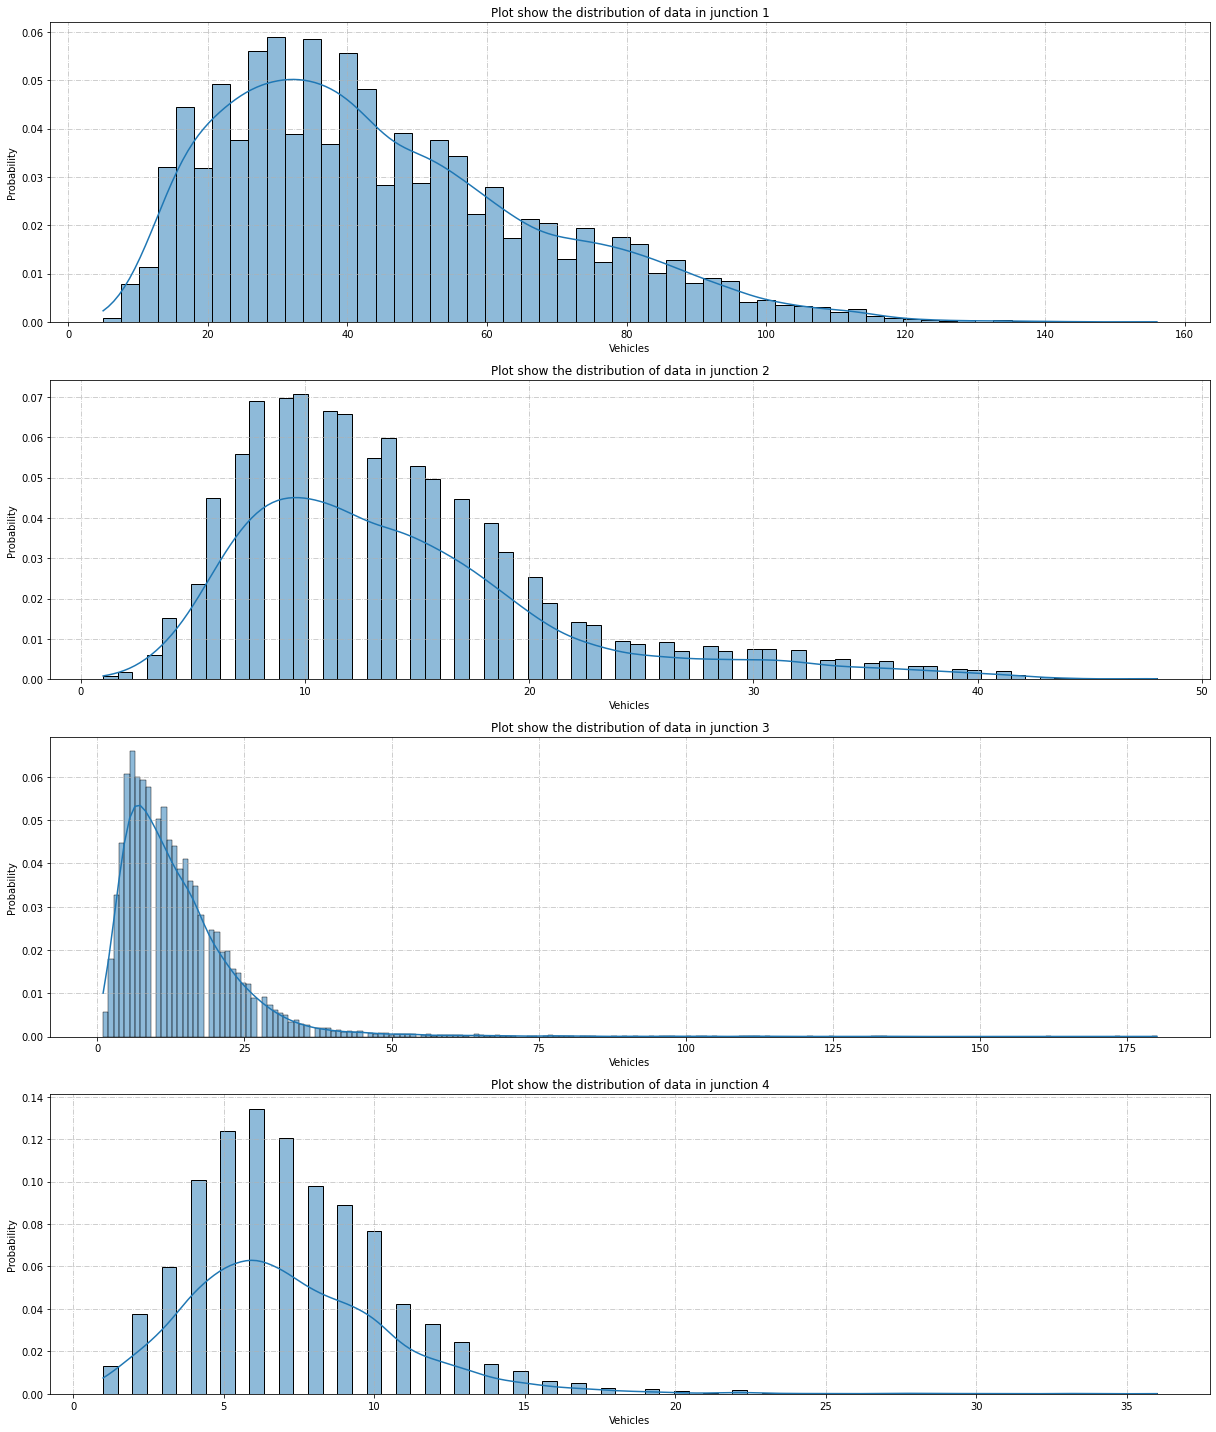

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(17, 20))

data = traffic[traffic['Junction'] == 1]
sns.histplot(data['Vehicles'], kde=True, stat='probability', ax=ax1)
ax1.set_title(f'Plot show the distribution of data in junction {1}')
ax1.grid(True, ls='-.', alpha=0.75)

data = traffic[traffic['Junction'] == 2]
sns.histplot(data['Vehicles'], kde=True, stat='probability', ax=ax2)
ax2.set_title(f'Plot show the distribution of data in junction {2}')
ax2.grid(True, ls='-.', alpha=0.75)

data = traffic[traffic['Junction'] == 3]
sns.histplot(data['Vehicles'], kde=True, stat='probability', ax=ax3)
ax3.set_title(f'Plot show the distribution of data in junction {3}')
ax3.grid(True, ls='-.', alpha=0.75)

data = traffic[traffic['Junction'] == 4]
sns.histplot(data['Vehicles'], kde=True, stat='probability', ax=ax4)
ax4.set_title(f'Plot show the distribution of data in junction {4}')
ax4.grid(True, ls='-.', alpha=0.75)
plt.tight_layout()

## Plots showing number of vehicles in all the junctions

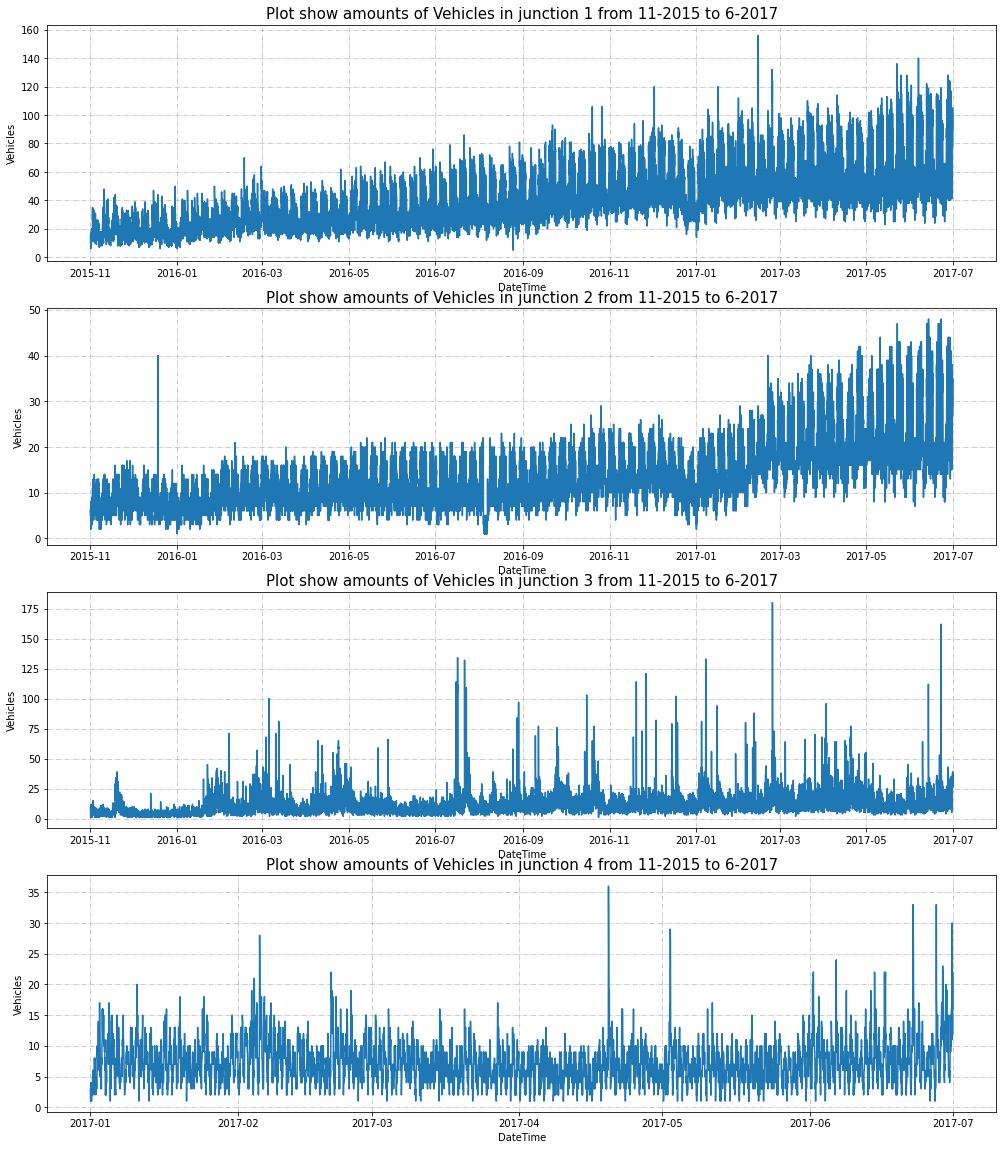

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(17, 20))
start = data.head(1)
end = data.tail(1)

data= traffic[traffic.Junction == 1]
ax1 = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax1)
ax1.set_title(f'Plot show amounts of Vehicles in junction {1} from {start.Month[0]}-{start.Year[0]} to {6}-{2017}', fontsize=15)
ax1.grid(True, ls='-.', alpha=0.75)

data= traffic[traffic.Junction == 2]
ax2 = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax2)
ax2.set_title(f'Plot show amounts of Vehicles in junction {2} from {start.Month[0]}-{start.Year[0]} to {6}-{2017}', fontsize=15)
ax2.grid(True, ls='-.', alpha=0.75)

data= traffic[traffic.Junction == 3]
ax3 = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax3)
ax3.set_title(f'Plot show amounts of Vehicles in junction {3} from {start.Month[0]}-{start.Year[0]} to {6}-{2017}', fontsize=15)
ax3.grid(True, ls='-.', alpha=0.75)

data= traffic[traffic.Junction == 4]
ax4 = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax4)
ax4.set_title(f'Plot show amounts of Vehicles in junction {4} from {start.Month[0]}-{start.Year[0]} to {6}-{2017}', fontsize=15)
ax4.grid(True, ls='-.', alpha=0.75)

plt.show()

## Correlation Heatmap

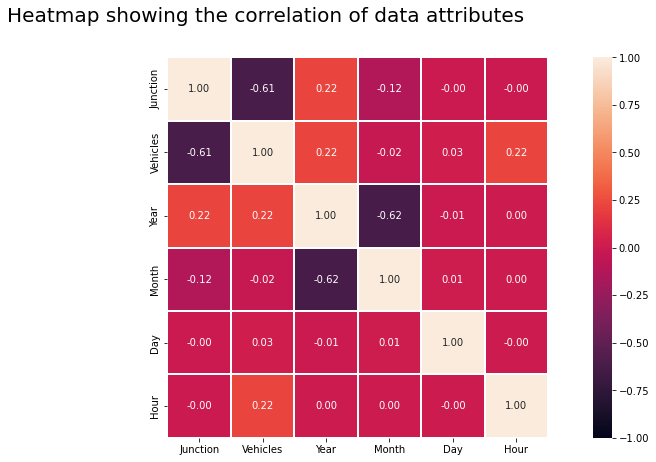

In [ ]:
corr = traffic.drop('DateTime', axis=1).corr()
f, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=20)
plt.show()

# Data Preprocessing

In [ ]:
scale = StandardScaler()
normalized_traffic = traffic.copy()
normalized_traffic['Vehicles'] = scale.fit_transform(normalized_traffic.Vehicles.values.reshape(-1, 1))
normalized_traffic.head()

,DateTime,Junction,Vehicles,Year,Month,Day,Hour
0,2015-11-01 00:00:00,1,-0.375489,2015,11,1,0
1,2015-11-01 01:00:00,1,-0.471875,2015,11,1,1
2,2015-11-01 02:00:00,1,-0.616454,2015,11,1,2
3,2015-11-01 03:00:00,1,-0.761034,2015,11,1,3
4,2015-11-01 04:00:00,1,-0.664648,2015,11,1,4


In [ ]:
#setting the X inputs and y targets
y = normalized_traffic['Vehicles']
X = normalized_traffic.drop(['DateTime', 'Vehicles'], axis=1,)

## spliting the train and test data 

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## modelling the data using random forest regressor

In [ ]:
forest = RandomForestRegressor()

### Tuning the hyperparpameters of the model

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


### fiting the model on best hyperparatmeters

In [ ]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtest, ytest)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
forest = RandomForestRegressor(bootstrap = True, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)

In [ ]:
forest = forest.fit(Xtrain, ytrain)

## testing the trained model on test data split

In [ ]:
y_pred = forest.predict(Xtest)

In [ ]:
explained_variance=metrics.explained_variance_score(ytest, y_pred)
mean_absolute_error=metrics.mean_absolute_error(ytest, y_pred) 
mse=metrics.mean_squared_error(ytest, y_pred) 
#mean_squared_log_error=metrics.mean_squared_log_error(ytest, y_pred)
median_absolute_error=metrics.median_absolute_error(ytest, y_pred)
r2=metrics.r2_score(ytest, y_pred)

In [ ]:
print('explained_variance: ', round(explained_variance,4))    
#print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9398
r2:  0.9398
MAE:  0.1551
MSE:  0.057
RMSE:  0.2387
